In [73]:
import pandas as pd
import numpy as np
import mplfinance as mpf
from mplfinance.original_flavor import candlestick_ohlc
from tvDatafeed import TvDatafeed, Interval
import statistics
import matplotlib.pyplot as plt

In [74]:
tv=TvDatafeed()

In [75]:
df=tv.get_hist(symbol='NIFTY_50',exchange='NSE',interval=Interval.in_daily, n_bars=200)

In [76]:
df['sma_20days']=df['close'].rolling(window=20).mean()
df['upper_bollinger']=df['sma_20days']+df['close'].rolling(window=20).std()
df['lower_bollinger']=df['sma_20days']-df['close'].rolling(window=20).std()

In [77]:
df

,symbol,open,high,low,close,volume,sma_20days,upper_bollinger,lower_bollinger
datetime,,,,,,,,,
2021-06-24 09:15:00,NSE:NIFTY_50,15737.300,15821.400,15702.700,15790.450,1.000000e+100,NaN,NaN,NaN
2021-06-25 09:15:00,NSE:NIFTY_50,15839.350,15870.800,15772.300,15860.350,1.000000e+100,NaN,NaN,NaN
2021-06-28 09:15:00,NSE:NIFTY_50,15915.350,15915.650,15792.150,15814.700,1.000000e+100,NaN,NaN,NaN
2021-06-29 09:15:00,NSE:NIFTY_50,15807.500,15835.900,15724.050,15748.450,1.000000e+100,NaN,NaN,NaN
2021-06-30 09:15:00,NSE:NIFTY_50,15776.900,15839.100,15708.750,15721.500,1.000000e+100,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
2022-04-06 09:15:00,NSE:NIFTY_50,17842.750,17901.000,17779.850,17807.650,1.000000e+100,17221.05505,17677.542196,16764.567904
2022-04-07 09:15:00,NSE:NIFTY_50,17723.301,17787.500,17623.699,17639.551,1.000000e+100,17285.76510,17701.492837,16870.037363
2022-04-08 09:15:00,NSE:NIFTY_50,17698.150,17842.750,17600.551,17784.350,1.000000e+100,17345.23760,17741.557130,16948.918070


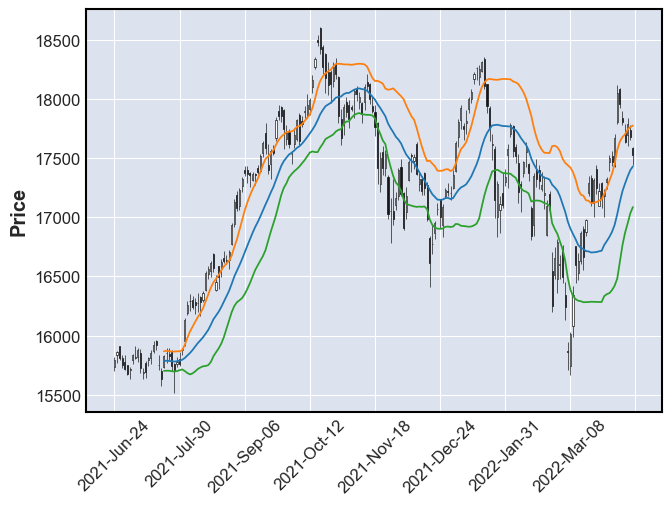

In [78]:
bollinger=df[['sma_20days','upper_bollinger','lower_bollinger']]
apd=[mpf.make_addplot(bollinger)]
op=mpf.plot(df,type='candle', volume=False, addplot=apd)

In [79]:
# buy=np.where(df['close'].shift(1)>df['upper_bollinger'].shift(1),1,np.nan)*df['close']
# sell=np.where(df['close'].shift(1)<df['lower_bollinger'].shift(1),1,np.nan)*df['close']

In [80]:
buy=np.where(df['close'].shift(1)<df['lower_bollinger'].shift(1),1,np.nan)*df['close']
sell=np.where(df['close'].shift(1)>df['upper_bollinger'].shift(1),1,np.nan)*df['close']

In [81]:
apd=[mpf.make_addplot(buy, scatter=True, markersize=50, marker=r'$\Uparrow$', color='green'),mpf.make_addplot(sell, scatter=True, markersize=50, marker=r'$\Downarrow$', color='red'),mpf.make_addplot(bollinger)]

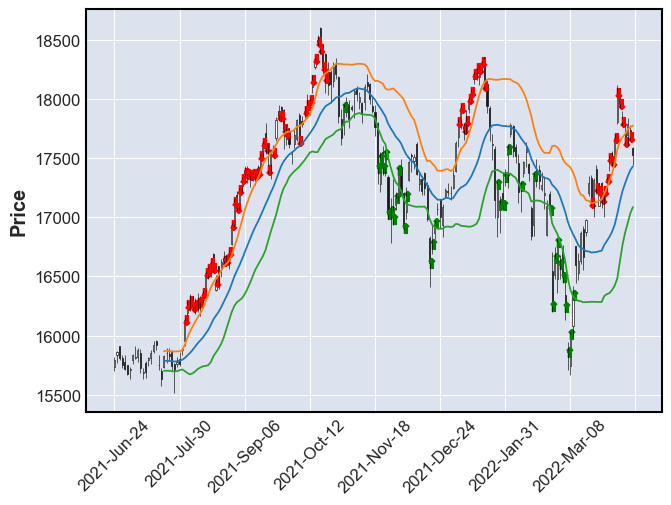

In [82]:
mpf.plot(df, type='candle', volume=False, addplot=apd)

In [83]:
pnl=buy.sum()-sell.sum()
pnl

-693195.8589999998